In [1]:
using DrWatson
quickactivate(@__DIR__)

using NetHeider
using LinearAlgebra
using LightGraphs
using Plots
using DataFrames
using JLD2
using Statistics

include(projectdir("scripts", "notebook_res_anal_funs.jl"))


show_res (generic function with 1 method)

In [2]:
res = jldopen(datadir("sims8", "collected_results.jld2")) do file
    file["res"]
end
first(res, 10)

,inform_every,add_edges,m_filename,pr_neg,padd,measure_balance_every_step
,Float64?,#add_sin…?,String?,Float64?,Float64?,Int64?
1,0.25,add_single_edge2!,results.csv,0.05,0.01,5
2,0.25,add_single_edge2!,results.csv,0.15,0.01,5
3,0.25,add_single_edge2!,results.csv,0.1,0.01,5
4,0.25,add_single_edge2!,results.csv,0.25,0.01,5
5,0.25,add_single_edge2!,results.csv,0.2,0.01,5
6,0.25,add_single_edge2!,results.csv,0.3,0.01,5
7,0.25,add_single_edge2!,results.csv,0.05,0.03,5
8,0.25,add_single_edge2!,results.csv,0.15,0.03,5
9,0.25,add_single_edge2!,results.csv,0.1,0.03,5


## Adding correct probs and their std

In [3]:
reps = res[1,"repetitions"]
time_steps = size(res[!,"bal_unbal_table"][1])[2]
rows = nrow(res)

bal2bal_mean_cors = []
bal2bal_std_cors = []
unbal2bal_mean_cors = []
unbal2bal_std_cors = []

for row in 1:rows
    bal2bal_mean_cor = zeros(time_steps)
    bal2bal_std_cor = zeros(time_steps)
    unbal2bal_mean_cor = zeros(time_steps)
    unbal2bal_std_cor = zeros(time_steps)

    for t in 1:time_steps
        vals_b2b = zeros(reps)
        vals_u2b = zeros(reps)
        for i in 1:reps
            B2B = res[row,"bal_unbal_table"][i,t,1,1]
            B2U = res[row,"bal_unbal_table"][i,t,1,2]
            U2B = res[row,"bal_unbal_table"][i,t,2,1]
            U2U = res[row,"bal_unbal_table"][i,t,2,2]

            vals_b2b[i] = B2B / (B2B + B2U)
            vals_u2b[i] = U2B / (U2B + U2U)
        end
        inds_b2b = .!(isnan.(vals_b2b))
        inds_u2b = .!(isnan.(vals_u2b))

        bal2bal_mean_cor[t] = mean(vals_b2b[inds_b2b])
        bal2bal_std_cor[t] = std(vals_b2b[inds_b2b])
        unbal2bal_mean_cor[t] = mean(vals_u2b[inds_u2b])
        unbal2bal_std_cor[t] = std(vals_u2b[inds_u2b])
    end

    push!(bal2bal_mean_cors, bal2bal_mean_cor)
    push!(bal2bal_std_cors, bal2bal_std_cor)
    push!(unbal2bal_mean_cors, unbal2bal_mean_cor)
    push!(unbal2bal_std_cors, unbal2bal_std_cor)
end

res.bal2bal_mean_cor = bal2bal_mean_cors
res.bal2bal_std_cor = bal2bal_std_cors
res.unbal2bal_mean_cor = unbal2bal_mean_cors
res.unbal2bal_std_cor = unbal2bal_std_cors

480-element Vector{Any}:
 [0.00531189624917493, 0.010090540027199687, 0.014679509173278057, 0.021680927663403626, 0.030348342554530176, 0.03322307146866542, 0.034066000190556917, 0.03425872927716786, 0.041437604175853446, 0.050976718154940384  …  0.22751012614530497, 0.22388868213075214, 0.2133392039011903, 0.22722185331720726, 0.2219395831580842, 0.22769380851512241, 0.23469995321867393, 0.24110402011705373, 0.22119173456407407, 0.22223988807287293]
 [0.0047383025027029095, 0.007257991241631052, 0.013799448814770587, 0.018066568042187547, 0.025200948966131082, 0.027091052089357207, 0.025280311031642827, 0.025003063822699872, 0.03757156635393425, 0.0400481766489607  …  0.057430354465518405, 0.04791428293079142, 0.04791428293079142, 0.07051657762043084, 0.04791428293079142, 0.032507590206790636, 0.032507590206790636, 0.032507590206790636, 0.04791428293079142, 0.020412414523193145]
 [0.004757563513954144, 0.01149314674736088, 0.011891174326676978, 0.013322800324486893, 0.0217011347180452

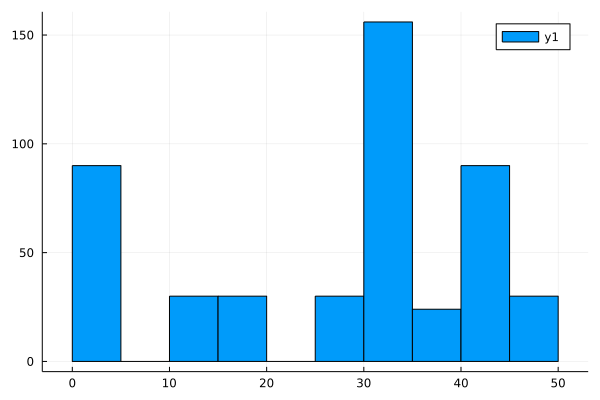

In [3]:
res.bal2bal_mean[100]
res.bu_mean[15][1,1,:]
sum(res.bu_mean[15][1,1,:])
# res.bal_unbal_table[1000][1,:,1,1]

histogram([sum(res.bu_mean[i][1,1,:]) for i in 1:nrow(res)])

In [4]:
res.bal2bal_mean[1]

80×1 Matrix{Float64}:
 1.0
 0.985
 0.965
 0.97
 0.935
 0.9296482412060301
 0.9296482412060301
 0.9195979899497487
 0.9045226130653267
 0.8894472361809045
 ⋮
 0.9347826086956522
 0.9402173913043478
 0.9402173913043478
 0.9402173913043478
 0.9508196721311475
 0.9508196721311475
 0.9508196721311475
 0.9508196721311475
 0.9508196721311475

In [5]:
names(res)[1:end]

40-element Vector{String}:
 "inform_every"
 "add_edges"
 "m_filename"
 "pr_neg"
 "padd"
 "measure_balance_every_step"
 "bal2not_mean2"
 "net_str"
 "balanced_std"
 "N"
 ⋮
 "unbal2bal_mean2"
 "triads_num"
 "last_val"
 "unbal2bal_mean"
 "attr"
 "pn"
 "save_after"
 "bal2bal_mean2"
 "path"

In [6]:
size(res)

(480, 40)

In [7]:
unique(res.pr_pos)

6-element Vector{Union{Missing, Float64}}:
 0.05
 0.15
 0.1
 0.25
 0.2
 0.3

In [10]:
# parameters
pn = 0.4
pclose_triad = 0.
pr_pos = pr_neg = 0.3
padd = 0.01
threshold = [0:15...]/16

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

display(nrow(cropped_res))

16

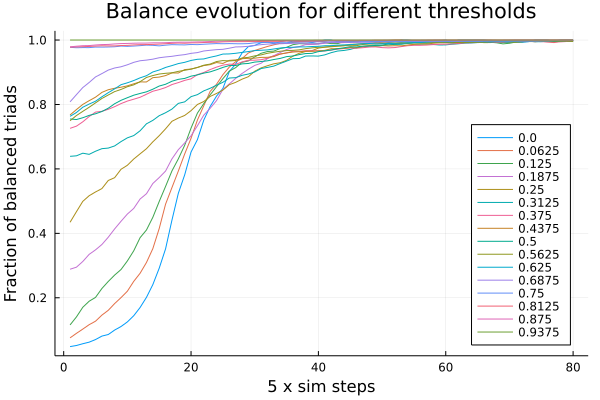

In [11]:
#balanced_mean

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :balanced_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("Fraction of balanced triads")
title!("Balance evolution for different thresholds")

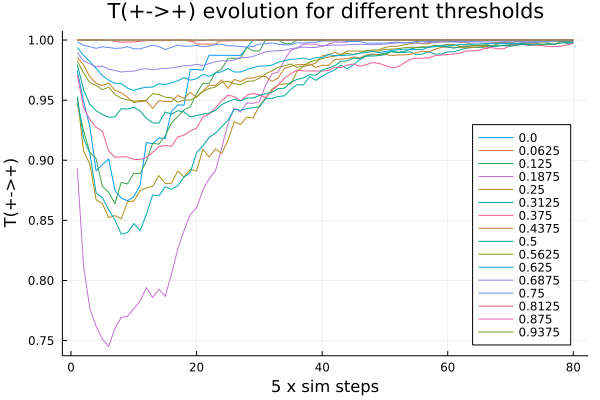

In [12]:
#bal2bal_mean, time evol

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("T(+->+)")
title!("T(+->+) evolution for different thresholds")

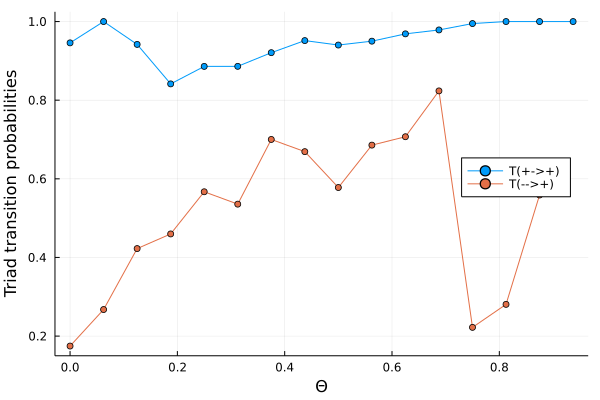

In [13]:
#bal2bal_mean, specific time

time_steps = 90
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
yvals1 = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
plot(xvals, yvals1, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)

yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Triad transition probabilities")
# title!("T(+->+) evolution for different thresholds")

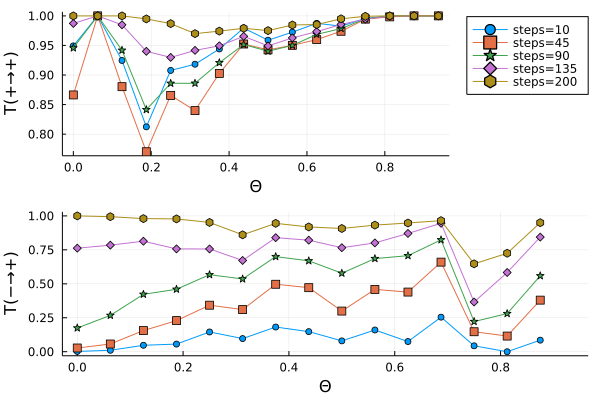

In [14]:
#bal2bal_mean, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)
ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)
end
plot(p1, p2, layout = (2,1))
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

In [15]:
time_ind = time_inds[end-1]
yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

16-element Vector{Float64}:
   0.7622950819672132
   0.784688995215311
   0.8135593220338982
   0.7569892473118279
   0.7565217391304349
   0.6718146718146718
   0.8397058823529412
   0.821247892074199
   0.765748031496063
   0.8011049723756906
   0.8709016393442623
   0.9456140350877194
   0.3658536585365853
   0.5833333333333334
   0.84375
 NaN

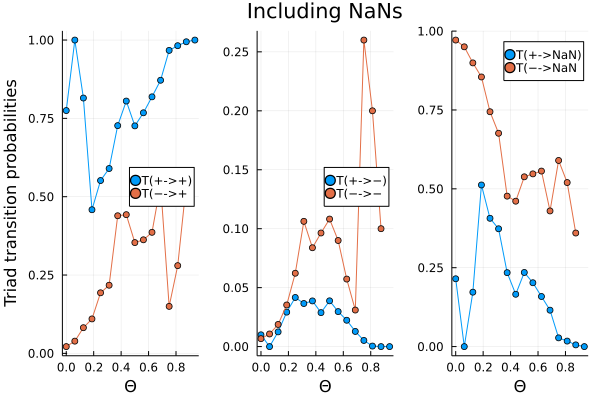

In [16]:
#bal2bal_mean2, specific time

time_steps = 135
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
b2b = [val[time_ind] for val in cropped_res[:, :bal2bal_mean2]]
b2u = [val[time_ind] for val in cropped_res[:, :bal2unbal_mean2]]
b2n = [val[time_ind] for val in cropped_res[:, :bal2not_mean2]]
u2b = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean2]]
u2u = [val[time_ind] for val in cropped_res[:, :unbal2unbal_mean2]]
u2n = [val[time_ind] for val in cropped_res[:, :unbal2not_mean2]]

p1 = plot(xvals, b2b, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)
plot!(xvals, u2b, markershape = :circle, label = "T(−->+")

p2 = plot(xvals, b2u, markershape = :circle, label = "T(+->−)", legend = :right)#, linestyle = :none)
plot!(xvals, u2u, markershape = :circle, label = "T(−->−")

p3 = plot(xvals, b2n, markershape = :circle, label = "T(+->NaN)", legend = :topright)#, linestyle = :none)
plot!(xvals, u2n, markershape = :circle, label = "T(−->NaN")

ylabel!(p1, "Triad transition probabilities")
title!(p2, "Including NaNs")
plot(p1, p2, p3, layout = (1,3))

# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")

# title!("T(+->+) evolution for different thresholds")

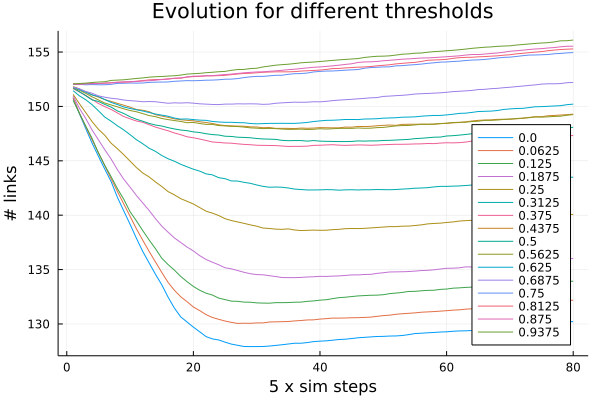

In [17]:
#links_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]

    vals = cropped_res[ind, :links_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# links")
title!("Evolution for different thresholds")

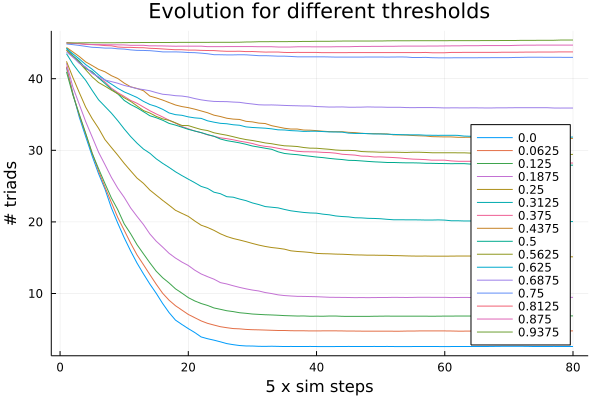

In [18]:
#triads_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    vals = cropped_res[ind, :triads_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# triads")
title!("Evolution for different thresholds")

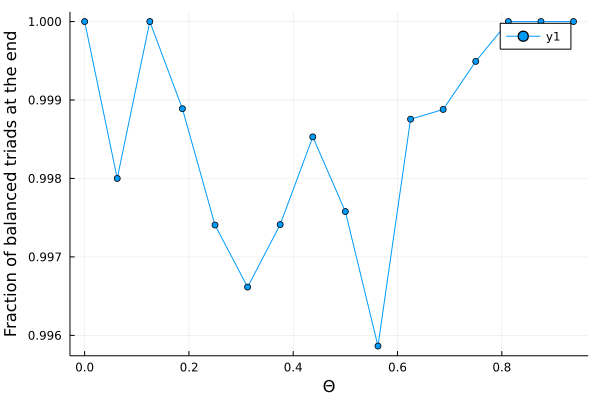

In [19]:
#last_val, specific time

# time_steps = 90
# time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = cropped_res[:, :last_val]
plot(xvals, yvals1, markershape = :circle)#, linestyle = :none)

# yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

# plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Fraction of balanced triads at the end")
# title!("T(+->+) evolution for different thresholds")

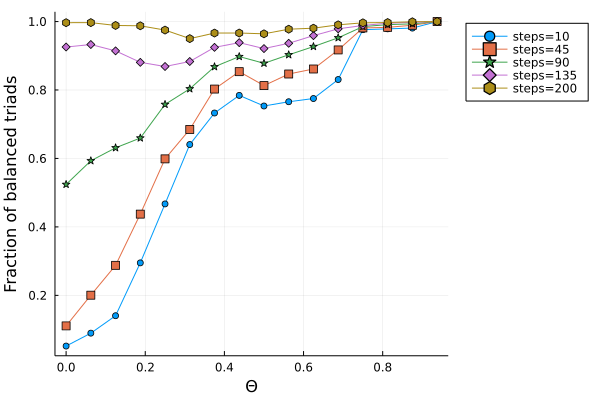

In [20]:
#balanced fraction, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("Fraction of balanced triads")
# p2 = plot(legend = false)
# ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :balanced_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    # yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    # plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
# plot(p1, p2, layout = (2,1))
plot(p1)
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

# Finding best simulation parameters

In [4]:
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
first(real_trans_df, 10)

,threshold,netsense_b2b,netsense_u2b,node_rand_b2b,node_rand_u2b,node_rand_b2b_std
,Float64,Any,Any,Any,Any,Any
1,0.0,0.4,0.0175439,0.2,0.00258333,0.18041
2,0.0625,0.2,0.0769231,0.374167,0.0163158,0.164333
3,0.125,0.631579,0.209302,0.486538,0.0582,0.11894
4,0.1875,0.612903,0.451613,0.560926,0.120694,0.0817351
5,0.25,0.794872,0.391304,0.696765,0.224655,0.0609315
6,0.3125,0.731707,0.619048,0.752222,0.332889,0.0561586
7,0.375,0.837209,0.736842,0.776813,0.406,0.0481336
8,0.4375,0.891304,0.375,0.817742,0.371515,0.0432376
9,0.5,0.869565,0.625,0.816774,0.400303,0.0430357


In [7]:
fname = datadir("exp_pro", "sims8_withT.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.4,0.0,0.05,1,9.0,2.65756,5.29519
2,0.01,0.05,0.4,0.0,0.05,1,18.0,2.07006,4.66935
3,0.01,0.05,0.4,0.0,0.05,1,27.0,1.88532,4.69514


false

In [32]:
# parameters
pn = unique(res.pn)
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    results_df.T_mse_notbeg = [0.]
    results_df.T_mae_notbeg = [0.]
    results_df.mse_manyT = [0.]
    results_df.mae_manyT = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
            T_mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "T--_mse_notbeg")
            T_mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "T--_mae_notbeg")
            mse_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_manyT")
            mae_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            temp_df.T_mse_notbeg = [T_mse_notbeg]
            temp_df.T_mae_notbeg = [T_mae_notbeg]
            temp_df.mse_manyT = [mse_manyT]
            temp_df.mae_manyT = [mae_manyT]
            
            append!(results_df, temp_df)
        end
    end

    # foldername = "exp_pro"

    # fname = datadir(foldername, "sim_add_each_turn_compared_to_rl_sims7_withT.jld2")
    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.4,0.0,0.05,1,9.0,2.65756,5.29519
2,0.01,0.05,0.4,0.0,0.05,1,18.0,2.07006,4.66935
3,0.01,0.05,0.4,0.0,0.05,1,27.0,1.88532,4.69514
4,0.01,0.05,0.4,0.0,0.05,1,36.0,1.84815,5.0113
5,0.01,0.05,0.4,0.0,0.05,1,54.0,2.30869,6.07452
6,0.03,0.05,0.4,0.0,0.05,2,9.0,2.7259,5.3394
7,0.03,0.05,0.4,0.0,0.05,2,18.0,2.09189,4.61116
8,0.03,0.05,0.4,0.0,0.05,2,27.0,1.90565,4.76378
9,0.03,0.05,0.4,0.0,0.05,2,36.0,1.88985,5.11929


In [24]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg, :T_mse_notbeg, :T_mae_notbeg, :mse_manyT, :mae_manyT]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


8×10 Matrix{Int64}:
 19  18  14  13   4  63   3   9  73   8
  7  18  12   2  17   3  13  72  62  22
 19   4  14  63   9  18  64  54  13  53
  3  63  18  19   8  13   4  14   7  73
 19   4  14  64  63  54   9  18  74  25
 63  19  18  73   3  14  53   4  13   8
 62  52  42  72  12  17   2  27  37   7
  7  12  72  17  22   2  62  52  42  67

In [25]:
valinds

8×10 Matrix{Float64}:
 1.69863   1.7752    1.81655   1.83954   …  1.88985   1.89112   1.90565
 4.61116   4.623     4.63734   4.66935      4.71721   4.74155   4.75611
 0.795157  0.84887   0.865966  0.91704      0.947736  0.958225  0.959772
 2.94181   2.94844   2.96069   2.96418      3.05165   3.06413   3.08202
 0.740878  0.794622  0.806509  0.839365     0.883637  0.884924  0.892554
 2.26351   2.37032   2.38395   2.39187   …  2.42189   2.45091   2.46802
 0.266251  0.267552  0.270568  0.271361     0.296962  0.300189  0.300492
 1.83294   1.83605   1.84766   1.87773      1.91409   1.93966   1.989

In [27]:
show_res(results_df, dicts, 62)
show_res(results_df, dicts, 7)
show_res(results_df, dicts, 12)
show_res(results_df, dicts, 72)
show_res(results_df, dicts, 42)

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.15, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"90.0"

In [29]:
show_res(results_df, dicts, 62)
show_res(results_df, dicts, 52)
show_res(results_df, dicts, 42)
show_res(results_df, dicts, 72)
show_res(results_df, dicts, 12)

show_res(results_df, dicts, 17)
show_res(results_df, dicts, 22)

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.15, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"90.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

To summarize. 

Overall, the best results were obtained with the following parameters. 

* Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 90
* Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 135

Slightly worse was:

* Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05), time = 270

Looking at the previous result (the model didn't change, just the time steps), my observation is that pr=0.05, pn=0.2. padd doesn't matter when pclose_triad=0.
If pclose_triad=0.35, then padd=0.09 seems the best option. 

## Assuming all T

In [7]:
fname = datadir("exp_pro", "sims8_withT_allT_err2.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [8]:
# parameters
pn = [0.4]
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [5:5:400...]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    results_df.mse_manyT = [0.]
    results_df.mae_manyT = [0.]
    results_df.mse_manyT_std = [0.]
    results_df.mae_manyT_std = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)   
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean_cor]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean_cor]]

            b2b_stds = [val[time_ind] for val in cropped_res[:, :bal2bal_std_cor]]
            u2b_stds = [val[time_ind] for val in cropped_res[:, :unbal2bal_std_cor]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]
            b2b_stds = b2b_stds[inds]
            u2b_stds = u2b_stds[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
            mse_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_manyT")
            mae_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")
            
            mse_manyT2, mse_manyT_std = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; 
                method = "mse_manyT", b2b1_std = b2b_stds, u2b1_std = u2b_stds)
            mae_manyT2, mae_manyT_std = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; 
                method = "mae_manyT", b2b1_std = b2b_stds, u2b1_std = u2b_stds)
            
            @assert mse_manyT .== mse_manyT2
            @assert mae_manyT .== mae_manyT2

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            temp_df.mse_manyT = [mse_manyT]
            temp_df.mae_manyT = [mae_manyT]
            temp_df.mse_manyT_std = [mse_manyT_std]
            temp_df.mae_manyT_std = [mae_manyT_std]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.4,0.0,0.05,1,1.0,5.63946,9.6516
2,0.01,0.05,0.4,0.0,0.05,1,2.0,4.71076,8.48137
3,0.01,0.05,0.4,0.0,0.05,1,3.0,4.15578,7.68266
4,0.01,0.05,0.4,0.0,0.05,1,4.0,3.72732,6.95117
5,0.01,0.05,0.4,0.0,0.05,1,5.0,3.42367,6.41656
6,0.01,0.05,0.4,0.0,0.05,1,6.0,3.19382,5.98256
7,0.01,0.05,0.4,0.0,0.05,1,7.0,3.02214,5.70287
8,0.01,0.05,0.4,0.0,0.05,1,8.0,2.77893,5.42506
9,0.01,0.05,0.4,0.0,0.05,1,9.0,2.65892,5.29787


In [9]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg, :mse_manyT, :mae_manyT]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


6×10 Matrix{Int64}:
 270  271  275  276  272   273  274   269  277  189
  21   22  262  270  189   261  188   265   23  271
 276  275  277  279  274   272  273   271   38  278
 190  271  270  189   26   269  272    22  273  191
 655  656  255  814  816  1135  815  1134  256  654
 176  255  655  173  172   814  256   252  257  175

In [20]:
results_df[655, :mae_manyT], results_df[655, :mse_manyT_std], results_df[655, :mae_manyT_std]

(1.8091307207612417, 0.14913444006686472, 0.6273628385776316)

In [11]:
valinds

6×10 Matrix{Float64}:
 1.70282   1.70286   1.70762   1.7113    …  1.73562   1.73746   1.74156
 4.52148   4.53442   4.56309   4.57556      4.59431   4.59514   4.59544
 0.795478  0.810492  0.81287   0.823322     0.83428   0.834917  0.834972
 2.83071   2.83648   2.85182   2.86859      2.88188   2.88842   2.89001
 0.229152  0.236078  0.244507  0.245518     0.250895  0.252381  0.252742
 1.80151   1.80754   1.80913   1.8127    …  1.82216   1.82532   1.82574

In [37]:
show_res(results_df, dicts, 814)
show_res(results_df, dicts, 176)
show_res(results_df, dicts, 655)
show_res(results_df, dicts, 815)
show_res(results_df, dicts, 173)
show_res(results_df, dicts, 255)


"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"70.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"80.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.15, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"75.0"

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"75.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"65.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"75.0"

In [58]:
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
1+1;

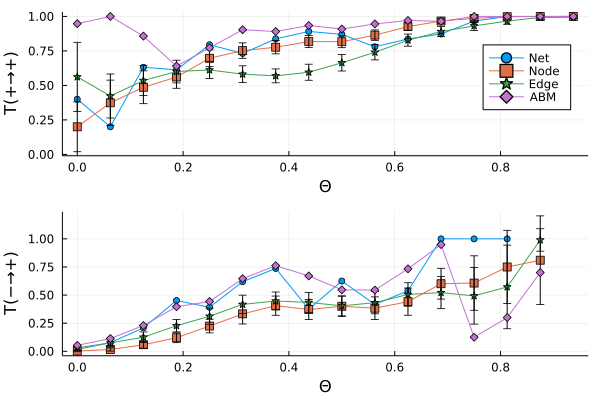

In [68]:
# parameters
pn = 0.4
pclose_triad = 0.
pr_pos = pr_neg = 0.15
padd = 0.07
threshold = [0:15...]/16

time_step = 90
time_ind = Int(time_step / 5)

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

xvals = real_trans_df.threshold
p1 = plot(xvals, real_trans_df.netsense_b2b, 
    markershape = :circle, label = "Net", legend = :right)#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_b2b, yerror = real_trans_df.node_rand_b2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_b2b, yerror = real_trans_df.edge_rand_b2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, b2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

# p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)

plot!(xvals, real_trans_df.netsense_u2b, 
    markershape = :circle, label = "Net")#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_u2b, yerror = real_trans_df.node_rand_u2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_u2b, yerror = real_trans_df.edge_rand_u2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)


ylabel!("T(−→+)")

plot(p1, p2, layout = (2,1))
xlabel!("Θ")

# title!("pn = 0.2, pclose_triad = 0, pr = 0.05, padd = 0.01")

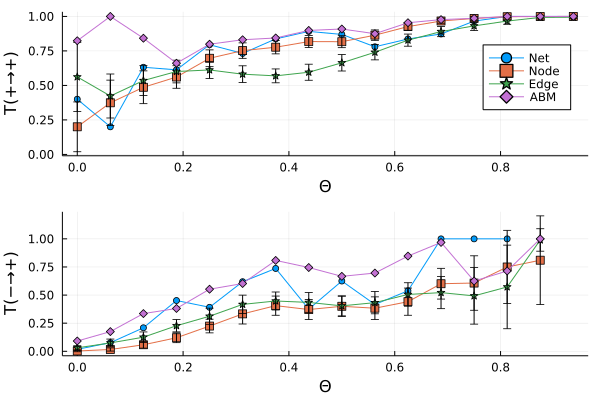

In [47]:
# parameters
pn = 0.4
pclose_triad = 0.
pr_pos = pr_neg = 0.05
padd = 0.01
threshold = [0:15...]/16

time_step = 135
time_ind = Int(time_step / 5)

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

xvals = real_trans_df.threshold
p1 = plot(xvals, real_trans_df.netsense_b2b, 
    markershape = :circle, label = "Net", legend = :right)#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_b2b, yerror = real_trans_df.node_rand_b2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_b2b, yerror = real_trans_df.edge_rand_b2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, b2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

# p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)

plot!(xvals, real_trans_df.netsense_u2b, 
    markershape = :circle, label = "Net")#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_u2b, yerror = real_trans_df.node_rand_u2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_u2b, yerror = real_trans_df.edge_rand_u2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)


ylabel!("T(−→+)")

plot(p1, p2, layout = (2,1))
xlabel!("Θ")

# title!("pn = 0.2, pclose_triad = 0, pr = 0.05, padd = 0.01")

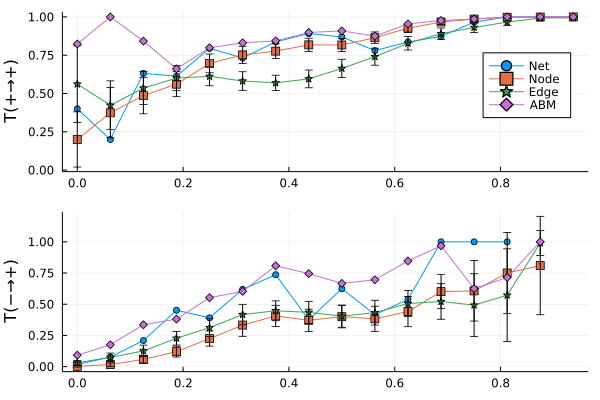

In [58]:
plot(p1, p2, layout = (2,1))

## Estimating padd influence

In [10]:
threshold = [7] / 16
# pn = [0.]

# parameters
# pn = [0.8]
# pclose_triad = unique(res.pclose_triad)
# pr_pos = pr_neg = unique(res.pr_pos)
# padd = unique(res.padd)
# threshold = [0:15...]/16

time_points = [45, 75, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict  threshold#padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

dict = dicts[1]

cropped_res = get_part_dataframe(res, dict; verbose =false)

nrow(cropped_res)

30

In [13]:
time_ind = time_inds[2]

cropped_res.b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
cropped_res.u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]];


In [14]:
using DataFrames, GLM

lm1 = fit(LinearModel, @formula(padd ~ b2b_vals), cropped_res)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

padd ~ 1 + b2b_vals

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0897196    0.299629  -0.30    0.7668  -0.703481   0.524042
b2b_vals      0.150206     0.322066   0.47    0.6445  -0.509516   0.809928
──────────────────────────────────────────────────────────────────────────

## Calculating error for edge and node randomizations

In [58]:
real_trans_df

,threshold,netsense_b2b,netsense_u2b,node_rand_b2b,node_rand_u2b,node_rand_b2b_std
,Float64,Any,Any,Any,Any,Any
1,0.0,0.4,0.0175439,0.2,0.00258333,0.18041
2,0.0625,0.2,0.0769231,0.374167,0.0163158,0.164333
3,0.125,0.631579,0.209302,0.486538,0.0582,0.11894
4,0.1875,0.612903,0.451613,0.560926,0.120694,0.0817351
5,0.25,0.794872,0.391304,0.696765,0.224655,0.0609315
6,0.3125,0.731707,0.619048,0.752222,0.332889,0.0561586
7,0.375,0.837209,0.736842,0.776813,0.406,0.0481336
8,0.4375,0.891304,0.375,0.817742,0.371515,0.0432376
9,0.5,0.869565,0.625,0.816774,0.400303,0.0430357


In [59]:
real_trans_df

mse = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
mse_manyT, mse_manyT_std = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; 
    method = "mse_manyT", b2b1_std = real_trans_df.node_rand_b2b_std, u2b1_std = real_trans_df.node_rand_u2b_std)
mae_manyT = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")

mse, mae, mse_notbeg, mae_notbeg, mse_manyT, mse_manyT_std, mae_manyT

(0.9327230755126914, 3.908759190827624, 0.8146233317693982, 3.1628818989844203, 0.6245155705112454, 0.1472798199178065, 2.746694895473855)

In [62]:

mse = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
mse_manyT, mse_manyT_std = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; 
    method = "mse_manyT", b2b1_std = real_trans_df.edge_rand_b2b_std / 10, u2b1_std = real_trans_df.edge_rand_u2b_std / 10)
mae_manyT = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")


mse, mae, mse_notbeg, mae_notbeg, mse_manyT, mse_manyT_std, mae_manyT

(1.257523772472556, 4.379225839404921, 1.1650954074853879, 3.798715754039451, 0.7323064065268363, 0.01664783886246231, 2.963388650278258)

## Can one calc std of error value?

In [27]:
function get_bal2x_std(p1, p2, p1_std, p2_std, repetitions)
    delta_p1 = p1_std./sqrt.(repetitions)
    delta_p2 = p2_std./sqrt.(repetitions)

    err = sqrt.((p2 .* delta_p1) .^ 2 .+ (p1 .* delta_p2) .^ 2 ) ./ (p1 .+ p2) .^ 2

    return err
end

get_bal2x_std (generic function with 1 method)

In [29]:
get_bal2x_std(res.bu_mean[1][:,1,1] , res.bu_mean[1][:,1,2] , res.bu_std[1][:,1,1], res.bu_std[1][:,1,2], res.repetitions[1] )

80-element Vector{Float64}:
 0.0
 0.008444724460402554
 0.01238099869913081
 0.011581673087907097
 0.015839527895091885
 0.016340830985574102
 0.016340830985574102
 0.017094748158779895
 0.018024737756273147
 0.01875612269405921
 ⋮
 0.01666923556826319
 0.016134091617913876
 0.016134091617913876
 0.016134091617913876
 0.0149910457454451
 0.0149910457454451
 0.0149910457454451
 0.0149910457454451
 0.0149910457454451

In [41]:
bal2bal_std = [get_bal2x_std(res.bu_mean[i][:,1,1] , res.bu_mean[i][:,1,2] , res.bu_std[i][:,1,1], res.bu_std[i][:,1,2], res.repetitions[i] ) for i in 1:nrow(res)]
unbal2bal_std = [get_bal2x_std(res.bu_mean[i][:,2,1] , res.bu_mean[i][:,2,2] , res.bu_std[i][:,2,1], res.bu_std[i][:,2,2], res.repetitions[i] ) for i in 1:nrow(res)]
# for i in 1:nrow(res)
#     # display(i)
#     bal2bal_std[i] = get_bal2x_std(res.bu_mean[i][:,1,1] , res.bu_mean[i][:,1,2] , res.bu_std[i][:,1,1], res.bu_std[i][:,1,2], res.repetitions[i] )
#     unbal2bal_std[i] = get_bal2x_std(res.bu_mean[i][:,2,1] , res.bu_mean[i][:,2,2] , res.bu_std[i][:,2,1], res.bu_std[i][:,2,2], res.repetitions[i] )
#     display(i)
# end
res.bal2bal_std = bal2bal_std
res.unbal2bal_std = unbal2bal_std

480-element Vector{Vector{Float64}}:
 [0.0005162593755765315, 0.0010186586351527296, 0.0014908921799759666, 0.0020985472181765897, 0.0029653454977427475, 0.003233682029085325, 0.0032859241317635957, 0.0033373380858096164, 0.004062473168820495, 0.005025550431617555  …  0.018814916614654714, 0.01844345204088255, 0.018151356264917585, 0.019091113337378684, 0.018964114176774287, 0.019324780266156635, 0.020146242805900102, 0.020255981680226513, 0.01917267504012816, 0.019267946918794028]
 [0.00047735511158175344, 0.0007267001179821543, 0.0013086702409719653, 0.0018085346123684403, 0.0024074510194733315, 0.0025992001997596744, 0.0024797643156058806, 0.0024314472444872362, 0.003720956814030578, 0.004206709585510257  …  0.007817075766153876, 0.006219205793689846, 0.006219205793689846, 0.0091571487878495, 0.0062366703369718295, 0.003952701802501669, 0.003952701802501669, 0.003952701802501669, 0.0062366703369718295, 0.0028209508432941385]
 [0.00047265881866591407, 0.0011885483165604892, 0.0011882

In [45]:
res.bu_mean[480][:,2,2]

80-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [38]:
bal2bal_std[1]

UndefRefError: UndefRefError: access to undefined reference

In [39]:
res.bal2bal_mean

480-element Vector{Union{Missing, Matrix{Float64}}}:
 [1.0; 0.985; … ; 0.9508196721311475; 0.9508196721311475]
 [0.985; 0.9547738693467336; … ; 1.0; 1.0]
 [0.98; 0.965; … ; 1.0; 1.0]
 [0.9949748743718593; 0.9899497487437185; … ; 1.0; 1.0]
 [0.9899497487437185; 0.9849246231155778; … ; 1.0; 1.0]
 [0.9748743718592965; 0.949238578680203; … ; 1.0; 1.0]
 [0.9849246231155778; 0.9798994974874372; … ; 0.9213483146067416; 0.9269662921348315]
 [0.9798994974874372; 0.9696969696969697; … ; 1.0; 1.0]
 [0.98; 0.9698492462311558; … ; 0.9938271604938271; 0.9938271604938271]
 [0.9849246231155778; 0.9695431472081218; … ; 1.0; 1.0]
 ⋮
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]
 [1.0; 1.0; … ; 1.0; 1.0]